In [39]:
from nltk.corpus import movie_reviews

from konlpy.tag import Okt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]
print(reviews[0][:100])
print(categories[0])

plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 

neg


In [4]:
X_train, X_test, y_train, y_test = train_test_split(reviews, categories, test_size=0.2, random_state=7)
print(len(X_train), len(X_test))

1600 400


In [6]:
tfidf = TfidfVectorizer(token_pattern=r"[\w']{2,}", min_df=2, max_df=0.5)
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)
print(X_train_tf.shape, X_test_tf.shape)

(1600, 22480) (400, 22480)


In [17]:
nb_clf = MultinomialNB(alpha=0.04)
nb_clf.fit(X_train_tf, y_train)
print(nb_clf.score(X_train_tf, y_train), nb_clf.score(X_test_tf, y_test))

0.98625 0.8275


In [20]:
df = pd.read_csv('./data/daum_movie_review.csv')
df.head()

,review,rating,date,title
0,돈 들인건 티가 나지만 보는 내내 하품만,1,2018.10.29,인피니티 워
1,몰입할수밖에 없다. 어렵게 생각할 필요없다. 내가 전투에 참여한듯 손에 땀이남.,10,2018.10.26,인피니티 워
2,이전 작품에 비해 더 화려하고 스케일도 커졌지만.... 전국 맛집의 음식들을 한데 ...,8,2018.10.24,인피니티 워
3,이 정도면 볼만하다고 할 수 있음!,8,2018.10.22,인피니티 워
4,재미있다,10,2018.10.20,인피니티 워


<Axes: xlabel='rating'>

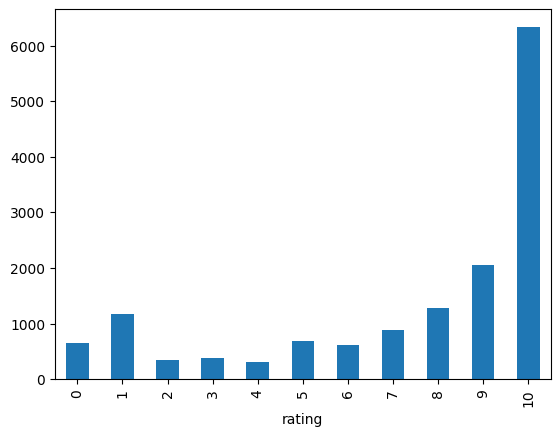

In [24]:
df['rating'].value_counts().sort_index().plot.bar()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['rating'],random_state=7)
print(len(X_train), len(X_test))

11043 3682


In [27]:
okt = Okt()

In [28]:
def kor_tokenizer(text):
    return [word for word, tag in okt.pos(text, norm=True, stem=True) if tag in ['Noun', 'Verb', 'Adjective']]

In [29]:
tfidf = TfidfVectorizer(tokenizer=kor_tokenizer, min_df=2, max_df=0.5)
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)
print(X_train_tf.shape, X_test_tf.shape)

c:\Coding\Local\python_text_mining\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(11043, 5696) (3682, 5696)


In [31]:
y_train_senti = (y_train > 6)
y_test_senti = (y_test > 6)

In [38]:
logreg_clf = LogisticRegression(max_iter=1000, C=5)
logreg_clf.fit(X_train_tf, y_train_senti)
print(logreg_clf.score(X_train_tf, y_train_senti), logreg_clf.score(X_test_tf, y_test_senti))

0.9244770442814453 0.854155350353069


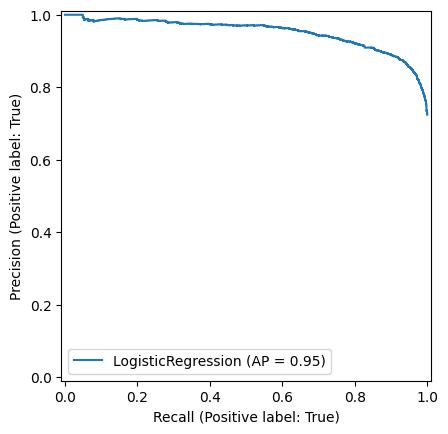

In [40]:
PrecisionRecallDisplay.from_estimator(logreg_clf, X_test_tf, y_test_senti)

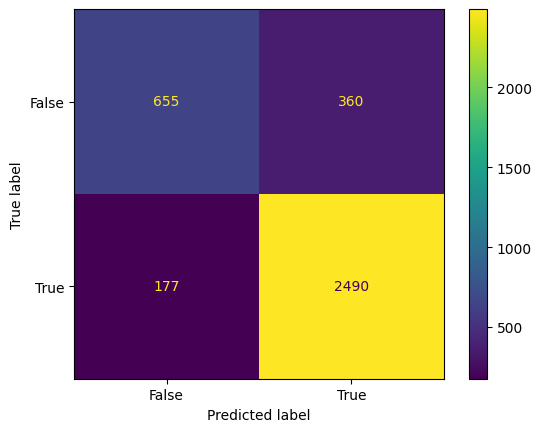

In [41]:
ConfusionMatrixDisplay.from_estimator(logreg_clf, X_test_tf, y_test_senti)

In [49]:
nb_clf = MultinomialNB(alpha=0.1)
nb_clf.fit(X_train_tf, y_train_senti)
print(nb_clf.score(X_train_tf, y_train_senti), nb_clf.score(X_test_tf, y_test_senti))

0.900117721633614 0.841933731667572


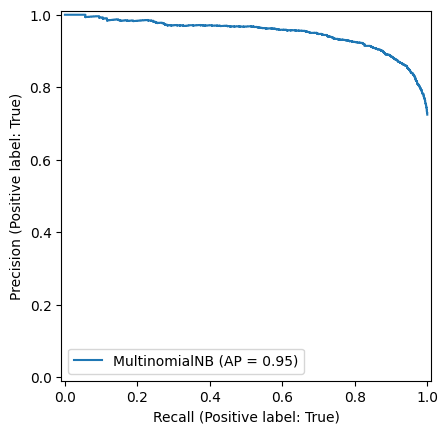

In [50]:
PrecisionRecallDisplay.from_estimator(nb_clf, X_test_tf, y_test_senti)

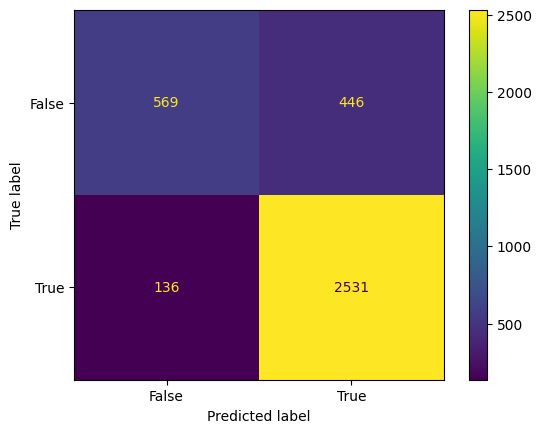

In [51]:
ConfusionMatrixDisplay.from_estimator(nb_clf, X_test_tf, y_test_senti)